<div hidden>
    $\newcommand{\q}{\left}$
    $\newcommand{\w}{\right}$
    $\newcommand{\m}{\middle}$
    $\newcommand{\e}{\boldsymbol}$
    $\newcommand{\cb}{\mspace{3mu}\m\vert\mspace{3mu}}$
</div>

<center>
    Sveučilište u Zagrebu<br>
    Fakultet elektrotehnike i računarstva<br>
    <a href="http://www.fer.unizg.hr/predmet/map">Multivarijatna analiza podataka</a><br>
    Ak. god. 2023./24.
</center>

<h1>
    Laboratorijska vježba 3: <br> Diskriminantna analiza, metode grupiranja i udaljenosti, analiza korespondencije
</h1>

**Rok za predaju: 6. lipnja 2024. (četvrtak) u 23:59h**

---

## Uvod i upute za predaju

Rješavanje vježbe svodi se na čitanje uputa u ćelijama s tekstom, nadopunjavanje blokova kôda (možete dodavati i dodatne blokove kôda ukoliko je potrebno) i ispisivanje rezultata (u vidu ispisa iz funkcija, tablica i grafova). Vježbu radite samostalno, a svoje rješenje branite na terminima koji su vam dodijeljeni u kalendaru. **Pritom morate razumjeti teorijske osnove implementiranih rješenja, u okviru onoga što je obrađeno na predavanjima, te morate pokazati da razumijete sav kôd koji ste napisali.** Zadatci u samoj vježbi su istraživačkog tipa  &mdash; ne postoji nužno samo jedan točan način rješavanja svakog zadatka, zato potičemo studente na eksperimentiranje.

Kôd možete pisati u Python ili R programskim jezicima. Ukoliko želite koristiti R, potrebno je instalirati određeni paket prema [ovim jednostavnim uputama](https://datatofish.com/r-jupyter-notebook/), i zatim odabrati R kernel u gornjem desnom kutu. **Osim ako u određenom zadatku ne piše drugačije, za implementaciju rješenja možete koristiti proizvoljne biblioteke.**

**Vaše rješenje potrebno je predati u sustav _Moodle_ u obliku .ipynb datoteke naziva IME_PREZIME_JMBAG.ipynb.** 

**Na ovoj vježbi možete ostvariti ukupno 10 bodova. Vaša Jupyter bilježnica ocjenjivat će se s mogućnošću ostvarivanja do 6 bodova. Bodovi iz bilježnice bit će uneseni u sustav prije Vašeg termina usmene obrane, na kojoj možete ostvariti preostala 4 boda. Napominjemo da će se prilikom ocjenjivanja strogo provjeravati originalnost vaših rješenja. Predstavljanje tuđeg rada kao vlastitog je kršenje kodeksa ponašanja studenata i takvi slučajevi bit će prijavljeni povjerenstvu za stegovnu odgovornost.**

Vježbu radite samostalno, a svoje rješenje branite na terminima koji su vam dodijeljeni u kalendaru. **Podsjećamo da bodovi iz laboratorijskih vježbi ulaze i u bodove na ispitnom roku, te da je za polaganje predmeta potrebno imati barem 50% ukupnih bodova iz laboratorijskih vježbi. Za ovu laboratorijsku vježbu, predaja Jupyter bilježnice i usmena obrana rješenja nisu obavezne. Možete predati bilježnicu bez dolaska na usmenu obranu, ali predaja bilježnice je nužan uvjet za usmenu obranu. Nadoknade laboratorijskih vježbi neće biti organizirane.** Za sva dodatna pitanja svakako se javite na email adresu predmeta: _map@fer.hr_.

---

## Podatkovni skup

U ovoj laboratorijskoj vježbi analizirat ćemo skup podataka s oko 1500 najpoznatijih klasičnih skladbi prema glasovima korisnika stranice [classicalmusiconly.com](https://classicalmusiconly.com/).
Opis varijabli dan je u tablici u nastavku:

<table>
    <thead>
        <tr>
            <th>Naziv stupca</th>
            <th>Opis</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><code>title</code></td>
            <td>naziv skladbe</td>
        </tr>
        <tr>
            <td><code>category</code></td>
            <td>kategorija kojoj skladba pripada<br>(sonata, simfonija, itd.)</td>
        </tr>
        <tr>
            <td><code>composer</code></td>
            <td>ime skladatelja</td>
        </tr>
        <tr>
            <td><code>year</code></td>
            <td>godina kada je skladba napisana</td>
        <tr>
            <td><code>epoch</code></td>
            <td>stilsko razdoblje</td>
        </tr>
        <tr>
            <td><code>country</code></td>
            <td>država rođenja skladatelja</td>
        <tr>
            <td><code>stars</code></td>
            <td>broj glasova <br> (koliko korisnika je označilo skladbu kao favorit))</td>
        </tr>
    </tbody>
</table>

---

Učitajte datoteku `classical_data.csv` i proučite podatke.
Varijable `category`, `composer`, `epoch` i `country` treba tretirati kao da se radi o kategorijskim varijablama.
Ispišite nekoliko redaka iz tablice.

In [1]:
import pandas as pd

data = pd.read_csv('classical_data.csv')
data.head()

,Unnamed: 0,title,category,composer,year,epoch,country,stars
0,1,The Four Seasons (Le Quattro Stagioni),Violin Concerto,Antonio Vivaldi,1723,Baroque,Italy,2515
1,2,"Requiem in D Minor, K. 626",Mass / Requiem,Wolfgang Amadeus Mozart,1791,Classical,Austria,2122
2,3,"Symphony No. 9 in D Minor, Op. 125",Symphony,Ludwig van Beethoven,1824,Early Romantic,Germany,2084
3,4,Nocturnes,Piano Sonata,Frédéric Chopin,1846,Romantic,Poland,1999
4,5,"Swan Lake, Op. 20",Ballet,Pyotr Ilyich Tchaikovsky,1876,Romantic,Russia,1335


---

## 1. Grupiranje

U ovom zadatku ćemo grupirati kategorije skladbi na temelju njihove sličnosti.

<b>a)</b> Izračunajte i prikažite <b>kontingencijsku tablicu</b> $\mathbf C$ između <b>skladatelja</b> i <b>kategorija.</b> Element kontingencijske tablice $C_{i, j}$ odgovara ukupnom broju skladbi u $j$-toj kategoriji koje je napisao $i$-ti skladatelj.

In [2]:
contingency_table = pd.crosstab(data['composer'], data['category'])
contingency_table

category,Ballet,Cello Concerto,Cello Sonata,Chant,Choral orchestral,Clarinet Quintet,Clarinet Sonata,Double Concerto,Flute Sonata,Harpsichord conceto,...,Symphony,Triple Concerto,Unsorted Chamber,Unsorted Instrument Sonatas,Unsorted Orchestral,Viola Concerto,Violin Concerto,Violin Sonata,Voice and Orchestra,Wind Concerto
composer,,,,,,,,,,,,,,,,,,,,,
Aaron Copland,2,0,0,0,0,0,0,0,0,0,...,1,0,0,0,4,0,0,0,0,1
Alban Berg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,1,0,0,0
Alessandro Scarlatti,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alexander Borodin,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
Alexander Glazunov,2,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
William Byrd,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
William Walton,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
Witold Lutosławski,0,0,1,0,0,0,0,0,0,0,...,2,0,0,0,3,0,0,0,0,0


---

Prije nego što nastavimo s grupiranjem, željeli bismo smanjiti broj kategorija koje ćemo uzeti u obzir. <br>
<b>b)</b> Grafički prikažite ukupan broj skladbi po pojedinoj kategoriji, <i>sortirano</i> uzlazno.
Zatim proizvoljno odredite prag, te izbacite sve kategorije (stupce kontingencijske tablice) koje po Vašem kriteriju sadrže premalo skladbi.
Ako nakon izbacivanja u tablici preostanu skladatelji koji imaju ukupno 0 skladbi, izbacite i takve retke. <br>
<b>Prikažite dobivenu tablicu i graf temeljem kojega ste odredili prag.</b>

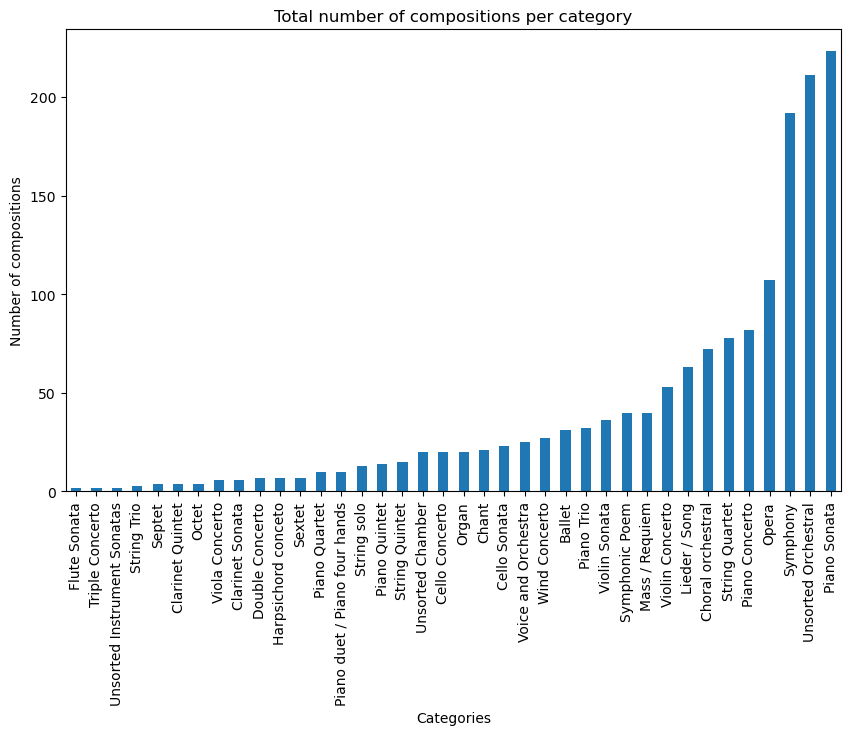

In [3]:
import matplotlib.pyplot as plt

categories_count = contingency_table.sum(axis=0)

categories_count = categories_count.sort_values()

plt.figure(figsize=(10, 6))
categories_count.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Number of compositions')
plt.title('Total number of compositions per category')
plt.show()


In [4]:
threshold = 30
categories_threshold = categories_count[categories_count >= threshold].index
contingency_table_threshold = contingency_table[categories_threshold]
contingency_table_threshold = contingency_table_threshold.loc[(contingency_table_threshold.sum(axis=1) > 0)]

contingency_table_threshold


category,Ballet,Piano Trio,Violin Sonata,Symphonic Poem,Mass / Requiem,Violin Concerto,Lieder / Song,Choral orchestral,String Quartet,Piano Concerto,Opera,Symphony,Unsorted Orchestral,Piano Sonata
composer,,,,,,,,,,,,,,
Aaron Copland,2,0,0,0,0,0,0,0,0,0,0,1,4,0
Alban Berg,0,0,0,0,0,1,1,0,1,0,2,0,2,1
Alessandro Scarlatti,0,0,0,0,0,0,0,3,0,0,0,0,0,1
Alexander Borodin,0,0,0,1,0,0,0,0,2,0,1,3,0,0
Alexander Glazunov,2,0,0,0,0,1,0,0,0,1,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
William Byrd,0,0,0,0,3,0,0,0,0,0,0,0,1,1
William Walton,1,0,0,0,0,1,0,0,0,0,0,0,0,0
Witold Lutosławski,0,0,0,0,0,0,0,0,0,1,0,2,3,1


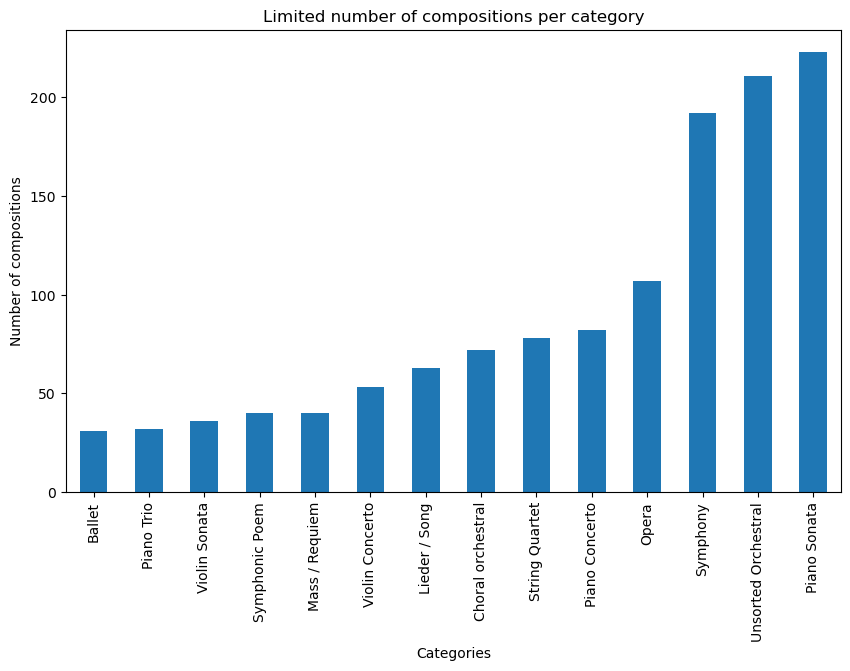

In [5]:
categories_threshold_count = contingency_table_threshold.sum(axis=0)

categories_threshold_count = categories_threshold_count.sort_values()

plt.figure(figsize=(10, 6))
categories_threshold_count.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Number of compositions')
plt.title('Limited number of compositions per category')
plt.show()

---

<b>c)</b> Provedite hijerarhijsko aglomerativno grupiranje (engl. <i>hierarchical agglomerative clustering</i>) nad <b>kategorijama.</b> Kao mjeru udaljenosti među kategorijama koristite <b>kosinusnu udaljenost</b> među stupcima kontingencijske tablice koju ste prethodno izračunali. Isprobajte različite metode za <b>spajanje grupa</b> (engl. <i>linkage</i>), te:
<ol>
    <li><b>nacrtajte dendrogram</b> za dobiveno grupiranje (vidi <a href="https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html">poveznicu</a> za pomoć),</li>
    <li>prema dendrogramu <b>odredite broj grupa.</b></li>
</ol>
<b>Odaberite jednu metodu povezivanja</b> koja Vam daje rezultate koje najlakše možete interpretirati.
U obzir uzmite balansiranost veličina klastera.
<b>Prikažite dendrogram</b> i <b>ispišite nazive kategorija</b> u pojedinoj grupi u konačnom rezultatu grupiranja.

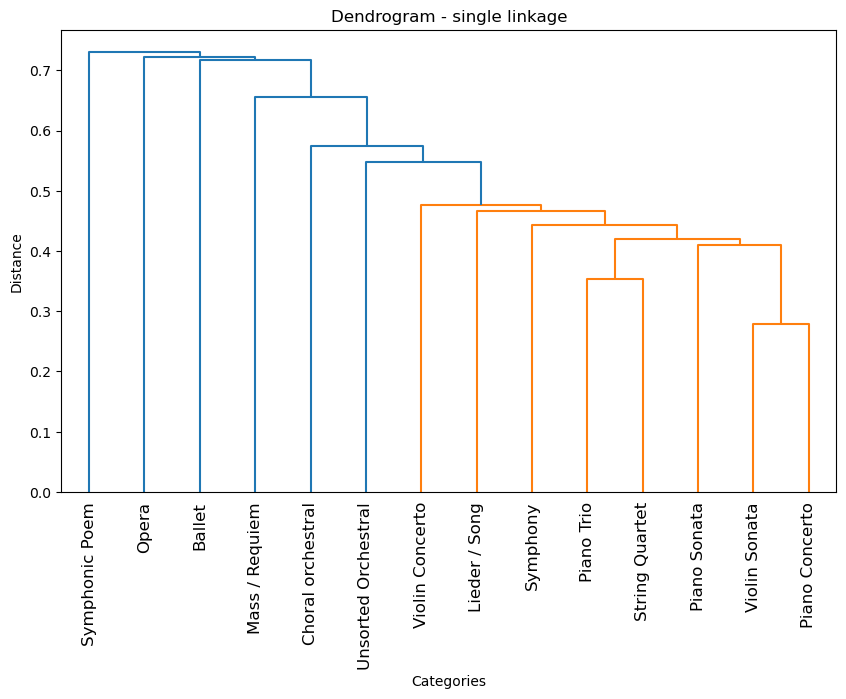

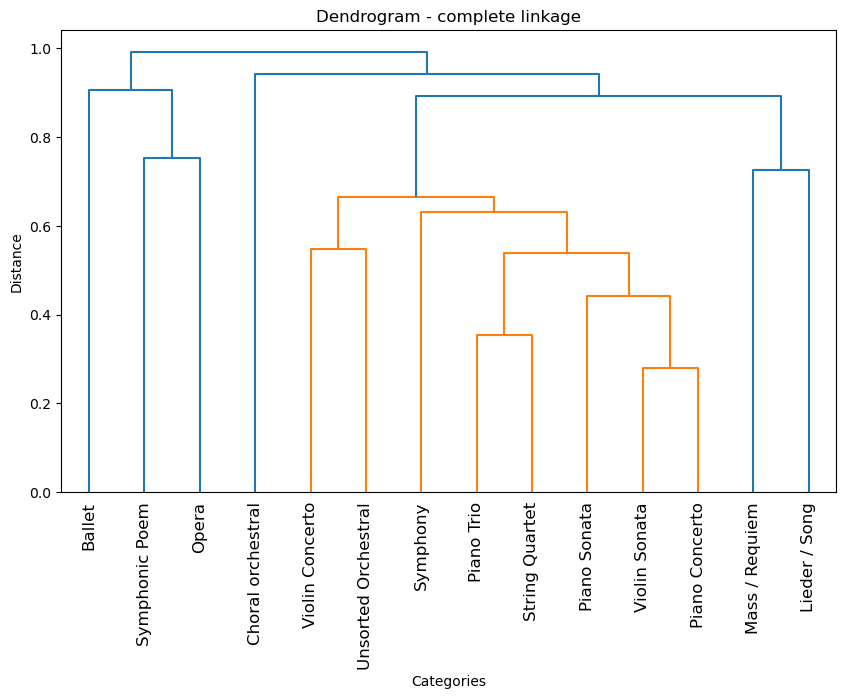

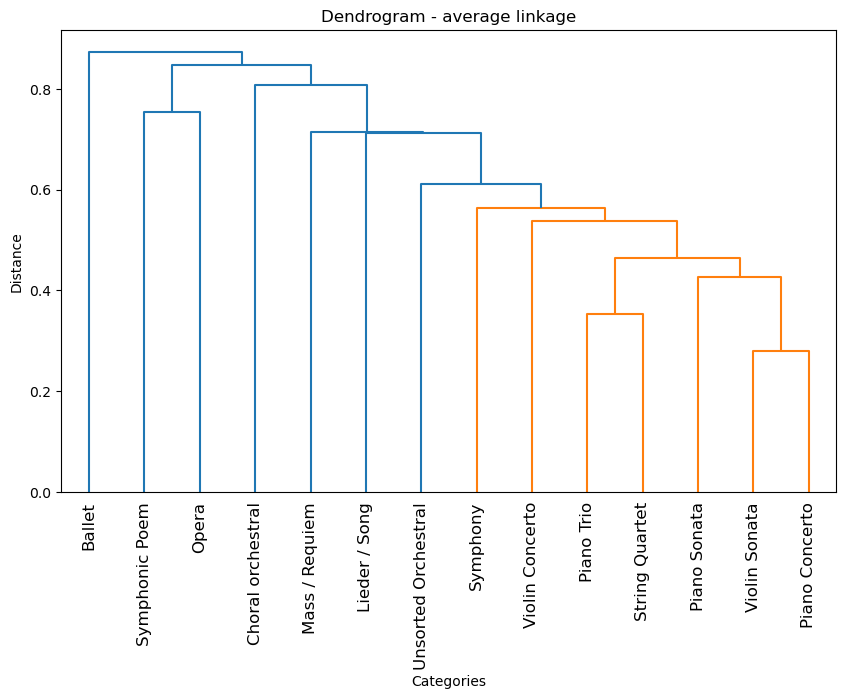

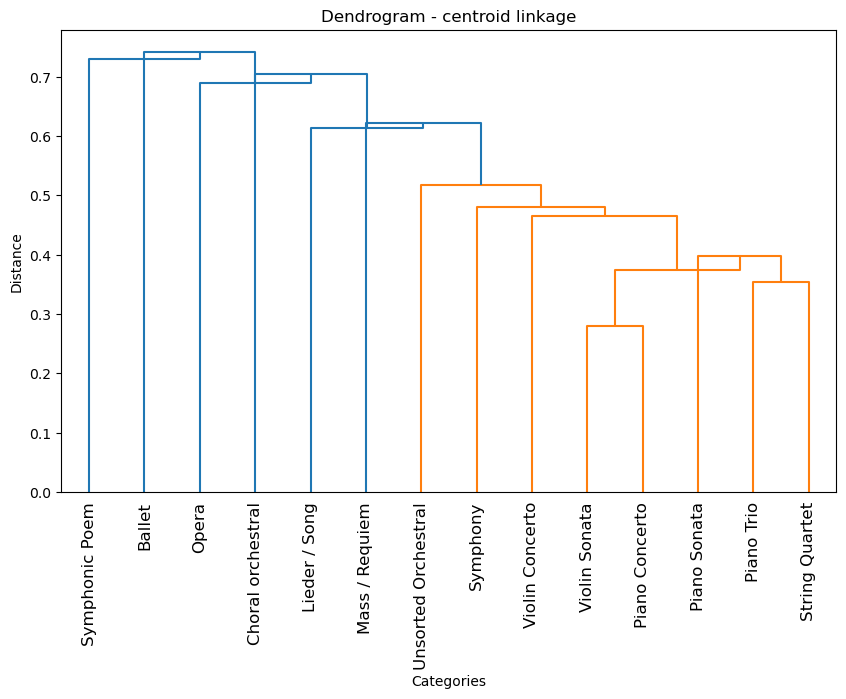

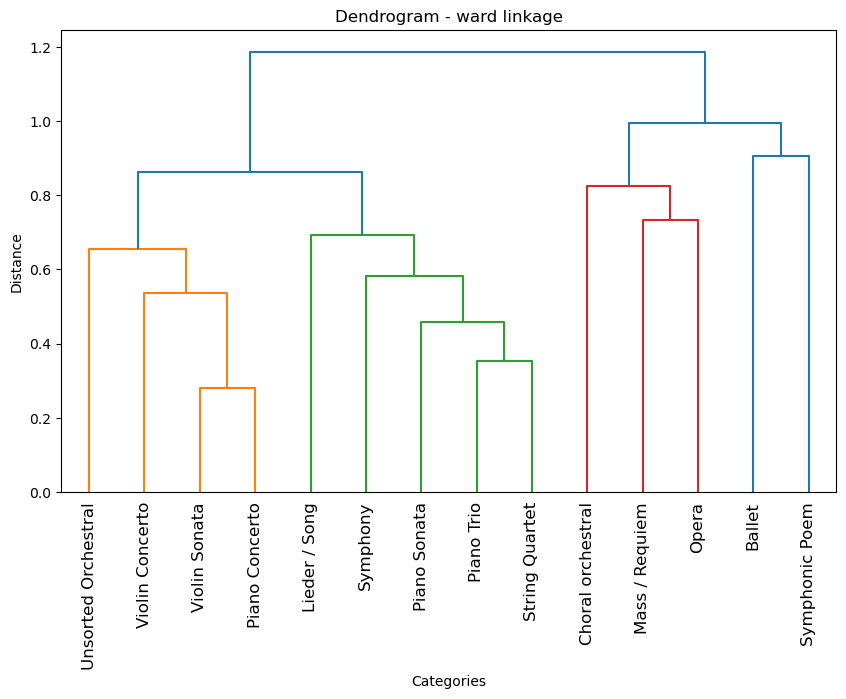

In [6]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

distance_matrix = pdist(contingency_table_threshold.T, metric='cosine')

linkage_methods = ['single', 'complete', 'average', 'centroid', 'ward']

for method in linkage_methods:
    linked = linkage(distance_matrix, method=method)
    
    plt.figure(figsize=(10, 6))
    dendrogram(linked, labels=categories_threshold, leaf_rotation=90)
    plt.title(f'Dendrogram - {method} linkage')
    plt.xlabel('Categories')
    plt.ylabel('Distance')
    plt.show()

Ako za primjer uzmem ward linkage, prije posljednjeg koraka grupe su sljedece:
1. grupa - (1) unsorted orchestral, violin concerto, violin sonata, piano concerto, (2) lieder/song, symphony, piano sonata, piano trio, string quarted
2. grupa - choral orchestral, mass/requiem, opera, ballet, symphonic poem

---

## 2. Linearna diskriminantna analiza

U ovom zadatku želimo vizualizirati klasifikaciju skladatelja s obzirom na to kojem stilskom razdoblju pripadaju, koristeći izvedene značajke temeljene na kategorijama skladbi koje su pisali.

---

<b>a)</b> Izračunajte i prikažite <b>kontingencijsku tablicu</b> $\mathbf C$ između <b>skladatelja</b> i <b>kategorija.</b> Element kontingencijske tablice $C_{i, j}$ odgovara ukupnom broju skladbi u $j$-toj kategoriji koje je napisao $i$-ti skladatelj, kao i u <b>1. a)</b>. Zatim, standardizirajte retke kontingencijske tablice na način da od svakog retka oduzmete njegovu srednju vrijednost, te ga podijelite s njegovom standardnom devijacijom.
<b>Prikažite ovako standardiziranu tablicu</b> te se uvjerite da su srednje vrijednosti svih redaka jednake 0 i njihove devijacije jednake 1.

In [16]:
contingency_table1 = pd.crosstab(data['composer'], data['category'])

std_contingency_table = contingency_table1.apply(lambda x: (x - x.mean()) / x.std(), axis=1)

print("Mean values by rows:\n", std_contingency_table.mean(axis=1).values)
print("\nStandard deviations by rows:\n", std_contingency_table.std(axis=1).values, "\n")

std_contingency_table


Mean values by rows:
 [ 4.67462326e-17  3.21380349e-17  3.06772152e-17  1.16865582e-17
  4.67462326e-17  4.38245931e-18 -5.84327908e-18  1.02257384e-17
  3.21380349e-17  1.60690175e-17  1.16865582e-17  5.25895117e-17
  3.21380349e-17  8.76491862e-18  8.76491862e-18 -5.84327908e-18
  2.62947558e-17 -8.76491862e-18  2.62947558e-17  1.75298372e-17
 -1.16865582e-17 -1.75298372e-17 -1.16865582e-17  4.67462326e-17
 -3.50596745e-17  4.38245931e-17 -3.50596745e-17  2.62947558e-17
  2.33731163e-17 -3.21380349e-17  2.77555756e-17  0.00000000e+00
  1.75298372e-17  1.02257384e-17  2.19122965e-17  4.09029535e-17
  3.79813140e-17  2.62947558e-17  2.33731163e-17 -2.92163954e-18
  4.96678722e-17 -1.75298372e-17  5.55111512e-17  1.46081977e-17
  2.92163954e-18 -2.33731163e-17  4.09029535e-17  4.38245931e-18
 -2.62947558e-17  1.16865582e-17  4.09029535e-17 -6.13544303e-17
  3.50596745e-17 -2.92163954e-18 -4.38245931e-18  5.55111512e-17
 -1.02257384e-17 -4.38245931e-18 -1.46081977e-18  5.25895117e-17
  2

category,Ballet,Cello Concerto,Cello Sonata,Chant,Choral orchestral,Clarinet Quintet,Clarinet Sonata,Double Concerto,Flute Sonata,Harpsichord conceto,...,Symphony,Triple Concerto,Unsorted Chamber,Unsorted Instrument Sonatas,Unsorted Orchestral,Viola Concerto,Violin Concerto,Violin Sonata,Voice and Orchestra,Wind Concerto
composer,,,,,,,,,,,,,,,,,,,,,
Aaron Copland,2.414957,-0.284113,-0.284113,-0.284113,-0.284113,-0.284113,-0.284113,-0.284113,-0.284113,-0.284113,...,1.065422,-0.284113,-0.284113,-0.284113,5.114026,-0.284113,-0.284113,-0.284113,-0.284113,1.065422
Alban Berg,-0.398709,-0.398709,-0.398709,-0.398709,-0.398709,-0.398709,-0.398709,-0.398709,-0.398709,-0.398709,...,-0.398709,-0.398709,-0.398709,-0.398709,3.389026,-0.398709,1.495159,-0.398709,-0.398709,-0.398709
Alessandro Scarlatti,-0.206880,-0.206880,-0.206880,-0.206880,5.689198,-0.206880,-0.206880,-0.206880,-0.206880,-0.206880,...,-0.206880,-0.206880,-0.206880,-0.206880,-0.206880,-0.206880,-0.206880,-0.206880,-0.206880,-0.206880
Alexander Borodin,-0.302613,-0.302613,-0.302613,-0.302613,-0.302613,-0.302613,-0.302613,-0.302613,-0.302613,-0.302613,...,4.625663,-0.302613,-0.302613,-0.302613,-0.302613,-0.302613,-0.302613,-0.302613,-0.302613,-0.302613
Alexander Glazunov,3.544418,-0.359579,-0.359579,-0.359579,-0.359579,-0.359579,-0.359579,-0.359579,-0.359579,-0.359579,...,3.544418,-0.359579,-0.359579,-0.359579,-0.359579,-0.359579,1.592420,-0.359579,-0.359579,1.592420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
William Byrd,-0.288892,-0.288892,-0.288892,1.540758,-0.288892,-0.288892,-0.288892,-0.288892,-0.288892,-0.288892,...,-0.288892,-0.288892,-0.288892,-0.288892,1.540758,-0.288892,-0.288892,-0.288892,-0.288892,-0.288892
William Walton,2.876859,2.876859,-0.338454,-0.338454,-0.338454,-0.338454,-0.338454,-0.338454,-0.338454,-0.338454,...,-0.338454,-0.338454,-0.338454,-0.338454,-0.338454,2.876859,2.876859,-0.338454,-0.338454,-0.338454
Witold Lutosławski,-0.338454,-0.338454,1.269202,-0.338454,-0.338454,-0.338454,-0.338454,-0.338454,-0.338454,-0.338454,...,2.876859,-0.338454,-0.338454,-0.338454,4.484515,-0.338454,-0.338454,-0.338454,-0.338454,-0.338454


---

<b>b)</b> Provedite postupak višeklasne <b>linearne diskriminantne analize</b>.
Klasificirajte skladatelje prema stilskom razdoblju kojem pripadaju (jedan skladatelj pripada samo jednom razdoblju), koristeći stupce prethodno standardizirane kontingencijske tablice iz 2. b) kao značajke.<br>
<b>Prikažite graf raspršenja</b> koristeći prve dvije diskriminante, gdje jedna točka predstavlja jednog skladatelja.
Različitom bojom prikažite različite klase. <br>
<b>Ispišite</b> udjele objašnjene varijance za sve diskriminante. <br>
Koje klase se najbolje razdvajaju od ostalih na dobivenom prikazu?

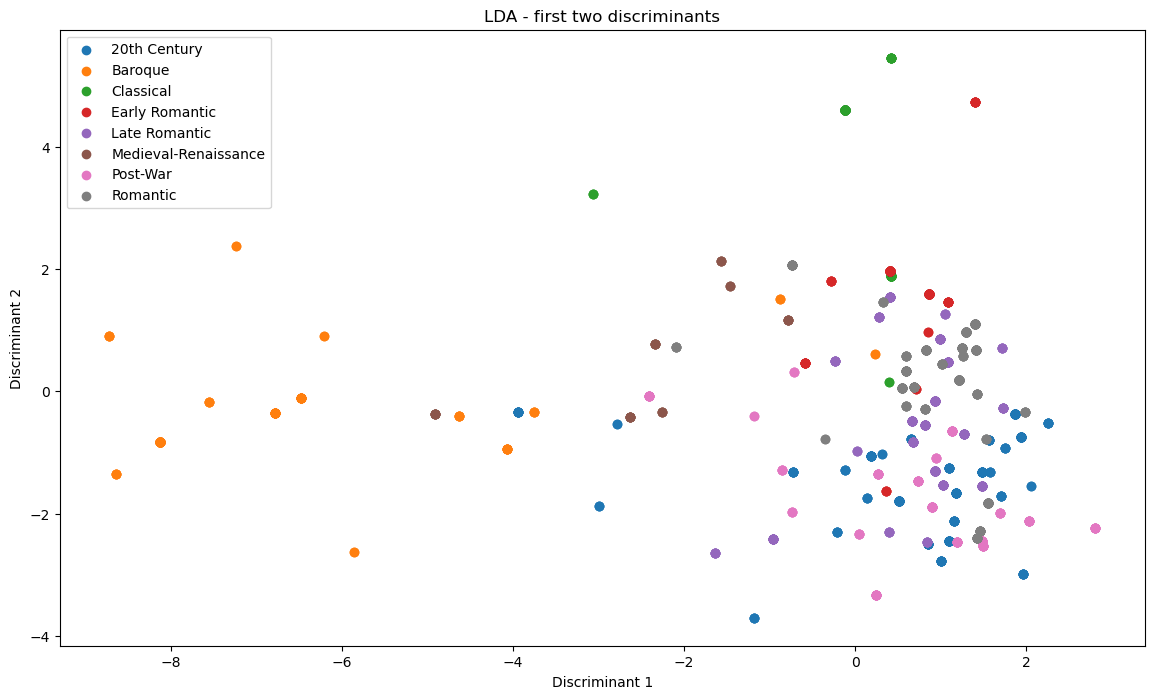

Proportions of explained variance for all discriminants:
 [0.40508119 0.18517839 0.15931009 0.10387533 0.07163075 0.05276168
 0.02216257]


In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np

comp = data['composer'].values
X = std_contingency_table.loc[comp].values
epochs = data['epoch'].values
y = epochs

lda = LinearDiscriminantAnalysis()
lda_transformed = lda.fit_transform(X, y)

plt.figure(figsize=(14, 8))
for epoch in np.unique(y):
    plt.scatter(lda_transformed[y == epoch, 0], lda_transformed[y == epoch, 1], label=epoch)
plt.xlabel('Discriminant 1')
plt.ylabel('Discriminant 2')
plt.legend()
plt.title('LDA - first two discriminants')
plt.show()

explained_variance_ratio = lda.explained_variance_ratio_
print("Proportions of explained variance for all discriminants:\n", explained_variance_ratio)


---

<b>c)</b> Ponovite postupak višeklasne <b>linearne diskriminantne analize</b>, ovaj put nad reduciranim skupom podataka koji sadrži samo sljedeća stilska razdoblja:
`
["Baroque", "Classical", "Early Romantic", "Romantic", "Late Romantic"]
`. <br>
<b>Prikažite graf raspršenja</b> koristeći prve dvije diskriminante, gdje jedna točka predstavlja jednog skladatelja.
Različitom bojom prikažite različite klase. <br>
<b>Ispišite</b> udjele objašnjene varijance za sve diskriminante. <br>
Komentirajte kvalitetu dobivenog prikaza u odnosu na prethodni podzadatak.

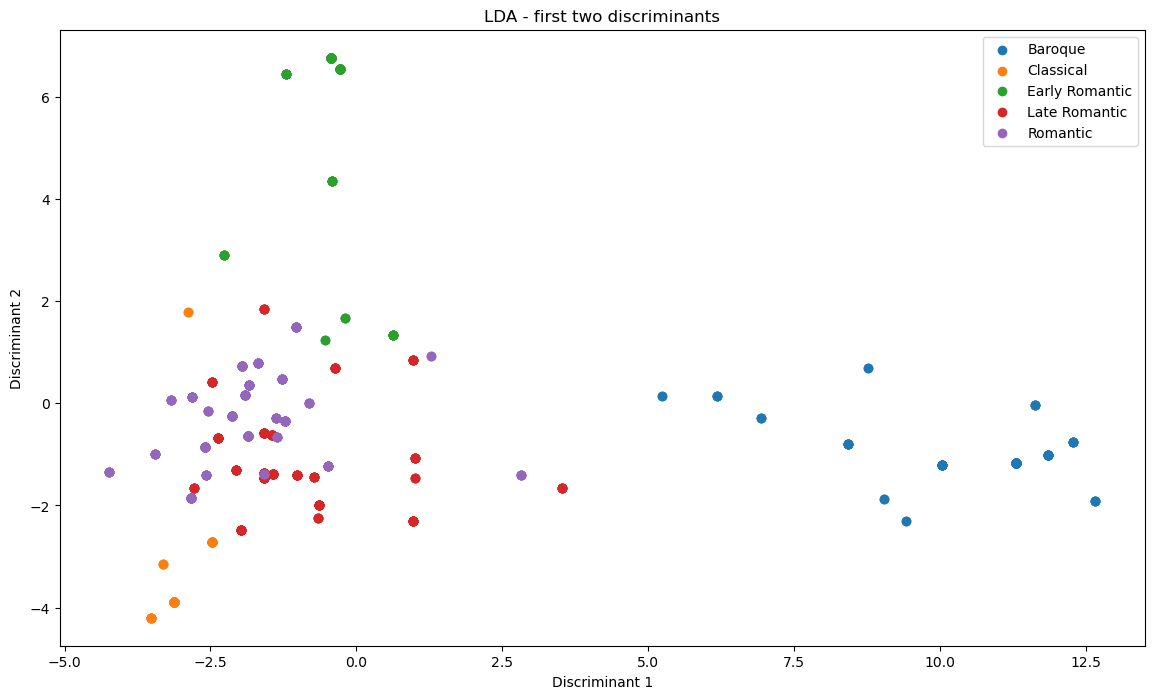

Proportions of explained variance for all discriminants:
 [0.56758222 0.25353846 0.12046941 0.05840991]


In [9]:
selected_epochs = ["Baroque", "Classical", "Early Romantic", "Romantic", "Late Romantic"]
selected_data = data[data['epoch'].isin(selected_epochs)]

composers1 = selected_data['composer'].values
epochs1 = selected_data['epoch'].values

X1 = std_contingency_table.loc[composers1].values
y1 = epochs1

lda1 = LinearDiscriminantAnalysis()
lda_transformed1 = lda1.fit_transform(X1, y1)

plt.figure(figsize=(14, 8))
for epoch in np.unique(y1):
    plt.scatter(lda_transformed1[y1 == epoch, 0], lda_transformed1[y1 == epoch, 1], label=epoch)
plt.xlabel('Discriminant 1')
plt.ylabel('Discriminant 2')
plt.legend()
plt.title('LDA - first two discriminants')
plt.show()

explained_variance_ratio1 = lda1.explained_variance_ratio_
print("Proportions of explained variance for all discriminants:\n", explained_variance_ratio1)


## 3. Višedimenzionalno skaliranje

U ovom zadatku želimo vizualizirati sličnosti između pojedinih stilskih razdoblja koristeći metričko i nemetričko skaliranje.

---

<b>a)</b>
**Izračunajte i prikažite** kontingencijsku tablicu za varijable `category` i `epoch` (stilsko razdoblje).
Neka retci sadrže kategorije, a stupci stilska razdoblja.

In [10]:
contingency_table2 = pd.crosstab(data['category'], data['epoch'])

contingency_table2


epoch,20th Century,Baroque,Classical,Early Romantic,Late Romantic,Medieval-Renaissance,Post-War,Romantic
category,,,,,,,,
Ballet,19,2,0,0,6,0,0,4
Cello Concerto,6,0,5,0,2,0,2,5
Cello Sonata,3,0,0,5,6,0,2,7
Chant,1,0,0,0,2,10,4,4
Choral orchestral,7,42,6,2,5,2,2,6
Clarinet Quintet,0,0,1,1,1,0,0,1
Clarinet Sonata,1,0,0,0,2,0,0,3
Double Concerto,1,1,2,0,0,0,0,3
Flute Sonata,1,1,0,0,0,0,0,0


---

<b> b)</b> **Izračunajte** udaljenosti među stilskim razdobljima koristeći *totalnu varijacijsku udaljenost*. 
Neka je $C$ kontingencijska matrica dimenzija $N \times M$, te neka su kategorije skladbi raspoređene po retcima, a stilska razdoblja po stupcima. Totalna varijacijska daljenost između dva stilska razdboblja $i$ i $j$ računa se kao
$$
\delta_{i,j} = \frac{1}{2} \sum_{k=1}^N \left\lvert \frac{C_{k,i}}{S_i} - \frac{C_{k,j}}{S_j} \right\rvert,
$$
gdje je $S_i = \sum_{k=1}^N C_{k,i}$. **Izračunajte i prikažite** matricu udaljenosti $\Delta$ čiji elementi su $\Delta_{i, j} = \delta_{i, j}$. <br>
Provjerite koji parovi kategorija su najsličniji, a koji najrazličitiji.

In [11]:

S = contingency_table2.sum(axis=0).values

n, m = contingency_table2.shape

delta = np.zeros((m, m))

for i in range(m):
    for j in range(m):
        delta[i, j] = 0.5 * np.sum(np.abs(contingency_table2.iloc[:, i] / S[i] - contingency_table2.iloc[:, j] / S[j]))

distance_matrix = pd.DataFrame(delta, index=contingency_table2.columns, columns=contingency_table2.columns)
distance_matrix


epoch,20th Century,Baroque,Classical,Early Romantic,Late Romantic,Medieval-Renaissance,Post-War,Romantic
epoch,,,,,,,,
20th Century,0.000000,0.585714,0.420856,0.454386,0.300816,0.770463,0.261111,0.301483
Baroque,0.585714,0.000000,0.651381,0.631880,0.592972,0.751987,0.616013,0.568025
Classical,0.420856,0.651381,0.000000,0.415740,0.442548,0.800908,0.516751,0.395069
Early Romantic,0.454386,0.631880,0.415740,0.000000,0.357317,0.737632,0.481725,0.308647
Late Romantic,0.300816,0.592972,0.442548,0.357317,0.000000,0.769916,0.377731,0.216492
Medieval-Renaissance,0.770463,0.751987,0.800908,0.737632,0.769916,0.000000,0.731419,0.807192
Post-War,0.261111,0.616013,0.516751,0.481725,0.377731,0.731419,0.000000,0.390255
Romantic,0.301483,0.568025,0.395069,0.308647,0.216492,0.807192,0.390255,0.000000


In [12]:
# najrazlicitiji
print("Distance of two most diverse categories:", np.max(delta))
print("And they are Romantic and Medieval-Rnaissance")
# najslicniji
print("Distance of two most similar categories:", np.min(delta[np.nonzero(delta)]))
print("And they are Romantic and Late Romantic")


Distance of two most diverse categories: 0.8071924383399793
And they are Romantic and Medieval-Rnaissance
Distance of two most similar categories: 0.21649168048136547
And they are Romantic and Late Romantic


---

<b>c)</b>
Provedite postupak klasičnog, <b>metričnog višedimenzionalnog skaliranja,</b> koristeći prethodno dobivenu <b>matricu udaljenosti.</b><br>
**Prikažite** kategorije na grafu raspršenja s **dvije dimenzije** i **označite** koju kategoriju pojedina točka predstavlja. 
<b>Ispišite</b> <i>stress</i> vrijedost.<br>
Uočavate li smisleno grupiranje kategorija prema njihovom povijesnom slijedu?

C:\Users\Karlo\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


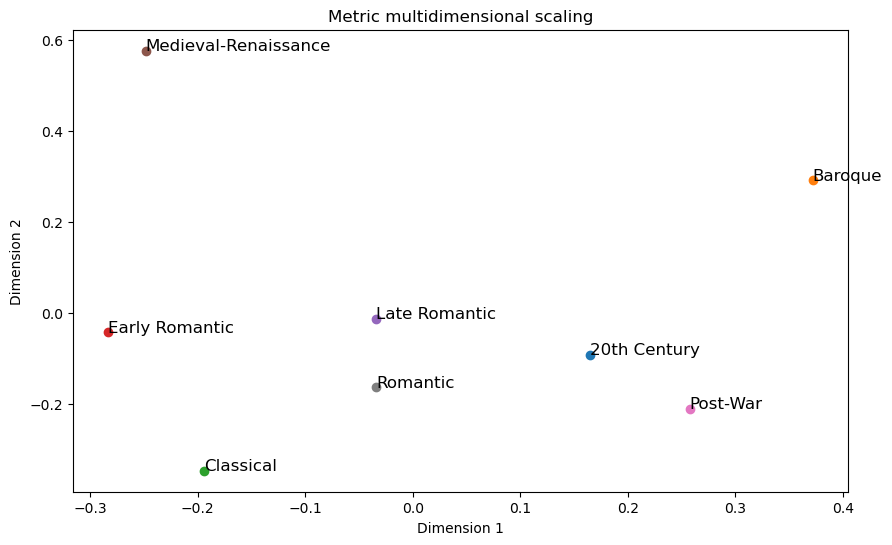

Stress value: 0.2939783935536303


In [13]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_coords = mds.fit_transform(delta)

plt.figure(figsize=(10, 6))
for i, epoch in enumerate(contingency_table2.columns):
    plt.scatter(mds_coords[i, 0], mds_coords[i, 1], label=epoch)
    plt.text(mds_coords[i, 0], mds_coords[i, 1], epoch, fontsize=12)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Metric multidimensional scaling')
plt.show()

print("Stress value:", mds.stress_)


--- 

<b>d)</b> Neka je $\mathbf C$ kontingencijska tablica s početka ovog zadatka.
Neka je mjera sličnosti između dvaju stilskih razdoblja $i$ i $j$ definirana na način:
\begin{equation}
\mathit{sim}\left(i, j\right) = \sum_{k = 0}^N \frac{\min \left\{C_{k, i}, C_{k, j} \right\}}{\max \left\{C_{k, i}, C_{k, j}\right\}}
\end{equation}
<b>Izračunajte sličnosti</b> između svih parova stilskih razdoblja. Zatim, sami izvedite neku mjeru različitosti temeljem izračunate mjere sličnosti.
Konačno, <b>izračunajte matricu različitosti</b> koja sadrži različitosti svih parova stilskih razdoblja.<br>
Kako se rezultati razlikuju u odnosu na 3. b)?

In [14]:
similarity = np.zeros((m, m))

for i in range(m):
    for j in range(m):
        similarity[i, j] = np.sum(np.minimum(contingency_table2.iloc[:, i], contingency_table2.iloc[:, j]) /
                                         np.maximum(contingency_table2.iloc[:, i], contingency_table2.iloc[:, j]))

dissimilarity = 1/similarity

dissimilarity_matrix = pd.DataFrame(dissimilarity, index=contingency_table2.columns, columns=contingency_table2.columns)

dissimilarity_matrix

# najslicniji su romantic i 20th centruy, a najudaljeniji baroque i medieval renaissance

epoch,20th Century,Baroque,Classical,Early Romantic,Late Romantic,Medieval-Renaissance,Post-War,Romantic
epoch,,,,,,,,
20th Century,0.030303,0.103930,0.084576,0.077935,0.073604,0.408621,0.071468,0.063318
Baroque,0.103930,0.052632,0.213052,0.146036,0.176728,0.472723,0.161258,0.218037
Classical,0.084576,0.213052,0.045455,0.083600,0.092757,0.384263,0.113878,0.095921
Early Romantic,0.077935,0.146036,0.083600,0.038462,0.077011,0.284876,0.097791,0.082538
Late Romantic,0.073604,0.176728,0.092757,0.077011,0.037037,0.419590,0.097818,0.066662
Medieval-Renaissance,0.408621,0.472723,0.384263,0.284876,0.419590,0.100000,0.236410,0.415942
Post-War,0.071468,0.161258,0.113878,0.097791,0.097818,0.236410,0.041667,0.103547
Romantic,0.063318,0.218037,0.095921,0.082538,0.066662,0.415942,0.103547,0.033333


---

<b>e)</b>
Provedite postupak <b>nemetričnog višedimenzionalnog skaliranja,</b> koristeći prethodno dobivenu <b>matricu različitosti.</b> <br>
**Prikažite** kategorije na grafu raspršenja s **dvije dimenzije** i **označite** koju kategoriju pojedina točka predstavlja. 
<b>Ispišite</b> <i>stress</i> vrijedost.<br>
Uočavate li smisleno grupiranje kategorija prema njihovom povijesnom slijedu?

C:\Users\Karlo\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


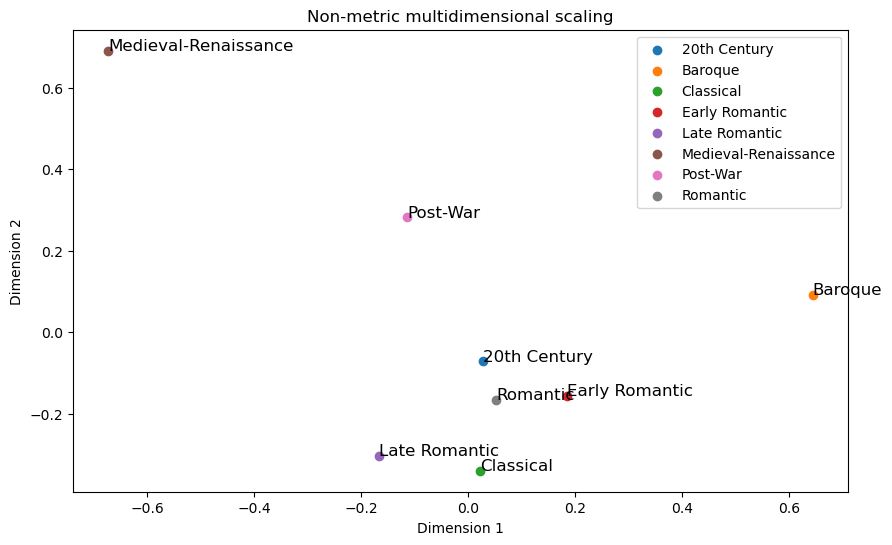

Stress value: 0.07557688680227154


In [15]:
nmds = MDS(n_components=2, dissimilarity='precomputed', metric=False, random_state=42)
nmds_coords = nmds.fit_transform(dissimilarity)

plt.figure(figsize=(10, 6))
for i, epoch in enumerate(contingency_table2.columns):
    plt.scatter(nmds_coords[i, 0], nmds_coords[i, 1], label=epoch)
    plt.text(nmds_coords[i, 0], nmds_coords[i, 1], epoch, fontsize=12)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Non-metric multidimensional scaling')
plt.legend()
plt.show()

print("Stress value:", nmds.stress_)


---

## 4. Analiza korespondencije (opcionalno &mdash; vidi napomenu)

<b>Napomena: </b> Zbog nepredviđenih promjena u nastavnom planu, ove akademske godine ovaj zadatak neće se bodovati (ni u predanom izvještaju niti na usmenoj obrani). Zadatak je ipak ovdje ostavljen kao dodatni materijal, te preporučujemo da ga riješite za vježbu nakon što se predavanja iz dotičnog dijela gradiva održe.

<b>a) </b>
**Kreirajte** novi podskup podataka tako da sadrži samo skladbe **prvih 5&ndash;10 skladatelja** po nekom kriteriju &mdash; proizvoljno odaberite kriterij po kojemu ćete ih poredati (npr. ukupan broj skladbi, ukupan broj glasova po svim skladbama, prosječan broj glasova po svim skladbama, ili samo odaberite 5&ndash;10 skladatelja po vlastitom izboru).
Zatim **odredite** koje kategorije skladbi se najčešće pojavljuju u dobivenom podskupu, te unutar njega zadržite samo skladbe koje pripadaju otprlike **5&ndash;10 najčešćih kategorija**.

---

U nastavku vježbe koristite ovako generirani podskup podataka.

<b>b)</b>**Izračunajte i prikažite** kontingencijsku tablicu između skladatelja i kategorije skladbi koje su napisali.


---

<b>c)</b> **Prikažite** graf raspršenja analize korespondencije između varijabli `composer` i `category` koristeći prve dvije komponente. 
Jasno <b>označite</b> (bojom i oblikom markera, ili natpisima) kojeg skladatelja, odnosno kategoriju, predstavlja pojedina točka.
<b>Ispišite</b> udjele objašnjene varijance za sve komponente, te ukupnu inerciju.
Također, na grafu <b>označite ishodište</b> radi lakše interpretacije. <br>
Obratite pozornost na objašnjenu varijancu temeljem prve dvije komponente. Na temelju dobivenog grafa i kontingencijske tablice iz prethodnog zadatka pokušajte odgovoriti na sljedeća pitanja:

-   Koji skladatelji se najviše izdvajaju po pojedinoj kategoriji?
-   Koji skladatelji su određenu kategoriju skladbi pisali znatno više ili manje u usporedbi s drugim skladateljima?
-   Koji skladatelji su određenu kategoriju skladbi pisali znatno više ili manje u usporedbi s drugim kategorijama?
-   Koji skladatelji su pisali prosječan broj skladbi u svim kategorijama?

---

<b>d)</b> <b>Provedite analizu korespondencije</b> između varijabli `country` i `epoch`.
U obzir uzmite <b>reducirani skup podataka</b> koji sadrži samo sljedeće države: `["Germany", "Austria", "Italy", "France", "Hungary", "Russia", "United States"]`.
<b>Prikažite graf</b> kao i u prethodnom podzadatku, te <b>ispišite</b> udjele objašnjene varijance i ukupnu inerciju.
Što možete zaključiti o odnosima država i stilskih razdoblja pomoću grafa?